# **PROBLEM STATEMENT**

A **retail store** that has multiple outlets across the country is facing **challenges in managing inventory efficiently** to match customer demand with the available supply.  

As a **Data Scientist**, your task is to **analyze the provided sales data** and derive **meaningful insights** that can help each store improve its operations and decision-making process.  

Additionally, you are required to **build a predictive model** to **forecast the sales for each store for the next 12 months**.  

The ultimate goal is to **assist the retail management team** in optimizing stock levels, enhancing sales strategies, and ensuring **better inventory planning** across all outlets.

#  **PROJECT OBJECTIVE**

**The main objective of this project** is to develop a **time series forecasting model** that can accurately **predict the weekly sales** for each retail store based on historical data and various influencing factors.

**Key goals of the project include:**

1. **To analyze** the historical sales data of multiple retail outlets to identify patterns, trends, and seasonality across different stores.  
2. **To handle data preprocessing tasks** such as checking and correcting data types, handling null or duplicate values, and detecting outliers in the target variable (`Weekly_Sales`).  
3. **To generate meaningful insights** through visualizations and correlation analysis that highlight the relationships between sales, temperature, fuel price, CPI, and unemployment rate.  
4. **To build and train an appropriate forecasting model** — specifically, the **Facebook Prophet model** — to handle outliers and capture seasonality effectively.  
5. **To forecast sales for each store for the next 12 weeks**, providing insights that can help in **inventory planning, demand forecasting, and business decision-making**.  

---

**In summary:**  
This project aims to help the retail company **better manage inventory and optimize operations** by predicting future weekly sales using a robust and reliable time series model.

## Data Description
- Row count: **1435**  
- Columns (8):
  - **Store** — store id (integer)
  - **Date** — weekly date (YYYY-MM-DD)
  - **Weekly_Sales** — sales for that week (target)
  - **Holiday_Flag** — 1 if holiday week, 0 otherwise
  - **Temperature** — avg weekly temperature
  - **Fuel_Price** — regional fuel price
  - **CPI** — consumer price index
  - **Unemployment** — region unemployment rate

Frequency: **Weekly**  
Target: `Weekly_Sales`

---

## Importing Basic Libraries

We import **NumPy, Pandas, Matplotlib, and Seaborn** to handle data, perform analysis, and create visualizations.  
**Reason:** These **fundamental libraries** support **data manipulation**, **processing**, and **visual understanding**.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset

We load the dataset using **pd.read_csv()** to access and analyze the raw data.  
**Reason:** Importing the dataset allows us to **inspect, clean, and prepare** it for further processing.

In [36]:
df=pd.read_csv('Walmart (1).csv')

In [37]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Checking for Missing Values

We check for **missing values** to identify **null or empty entries** in the dataset.  
**Reason:** **Missing data** reduces **data quality** and affects **model performance**.

In [40]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Checking for Duplicate Records

We check for **duplicate records** to ensure the dataset does not contain **repeated rows**.  
**Reason:** **Duplicate data** can cause **bias** and lead to **incorrect analysis**.

In [44]:
df.duplicated().sum()

0

## Checking Dataset Information

We use **df.info()** to review **data types**, **memory usage**, and **column structure**.  
**Reason:** Understanding **data types** helps decide **cleaning and transformation** steps.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


##  Converting ‘Date’ Column to Datetime Format  
While checking data types, we found that the **Date** column was in object format.  
So, we converted it using `pd.to_datetime(df['Date'])`.  
**Reason:**  Time-series operations require the Date column to be in datetime format for accurate processing.

In [49]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [50]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Checking Statistical Summary

We use **df.describe()** to view key **statistical measures** such as mean, median, minimum, and maximum.  
**Reason:** It helps to **understand data distribution**, detect **abnormal values**, and guide **further processing**.

In [52]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


#  Exploratory Data Analysis (EDA) – Per Store Visualization   
**Reason:** To observe patterns, seasonality, and sales variations across different stores.

###  Date vs Weekly Sales  
We plotted **Date** vs **Weekly_Sales** for all stores combined.  
**Reason:** To observe overall sales trend, seasonality, and major peaks across time.


In [57]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

for i in df['Store'].unique():
    plt.figure(figsize=(19,5))
    sns.lineplot(x='Date', y='Weekly_Sales', data=df[df['Store']==i])
    plt.title(f'Store {i}')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

###  Date vs Temperature  
We plotted **Date** vs **Temperature**.  
**Reason:** To analyze how temperature fluctuations might influence sales or seasonal demand.

In [66]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

for i in df['Store'].unique():
    plt.figure(figsize=(19,5))
    sns.lineplot(x='Date', y='Temperature', data=df[df['Store']==i])
    plt.title(f'Store {i}')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

### Date vs Fuel Price  
We plotted **Date** vs **Fuel_Price**.  
**Reason:** To check if changes in fuel prices have any indirect correlation with weekly sales.

In [69]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

for i in df['Store'].unique():
    plt.figure(figsize=(19,5))
    sns.lineplot(x='Date', y='Fuel_Price', data=df[df['Store']==i])
    plt.title(f'Store {i}')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

###  Date vs CPI (Consumer Price Index)  
We plotted **Date** vs **CPI**.  
**Reason:** To understand how inflation or cost-of-living changes may align with sales patterns.

In [72]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

for i in df['Store'].unique():
    plt.figure(figsize=(19,5))
    sns.lineplot(x='Date', y='CPI', data=df[df['Store']==i])
    plt.title(f'Store {i}')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

###  Date vs Unemployment  
We plotted **Date** vs **Unemployment**.  
**Reason:** To evaluate whether employment levels impact purchasing behavior and store sales.

In [75]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

for i in df['Store'].unique():
    plt.figure(figsize=(19,5))
    sns.lineplot(x='Date', y='Unemployment', data=df[df['Store']==i])
    plt.title(f'Store {i}')
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

##  Correlation Analysis  
We generated a correlation matrix to see how features relate to each other and to **Weekly_Sales**.  
**Reason:** Helps identify  variables have strong or weak relationships with each other and  the target variable.

<Axes: >

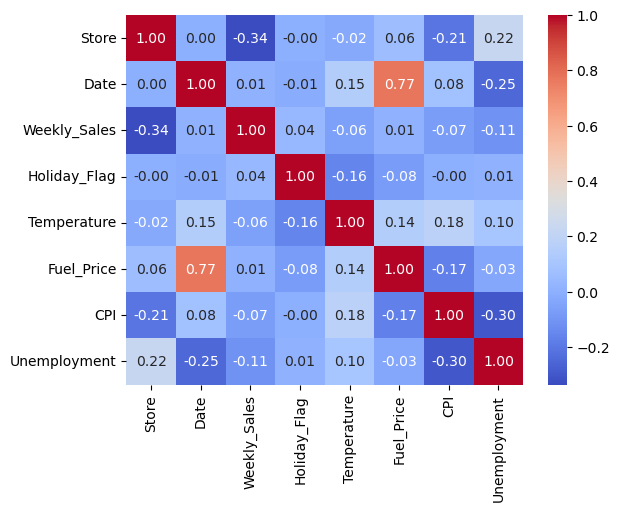

In [78]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

# Multicollinearity Check (VIF Threshold)  
We calculated the **Variance Inflation Factor (VIF)** for each numeric predictor.  
**Threshold:** A VIF value above **10** indicates high multicollinearity.  
**Reason:** High VIF means redundant information between features, which can affect model stability.


In [82]:
x=df.drop(columns=['Weekly_Sales','Date'],axis=1)
# here our Weekly Sales column is target column and Date column's datatype is 'datetime64' 
# it is not valid in Vif so we temporarily droping both of them.

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif=pd.DataFrame()
vif['column']= x.columns
vif['Multicollinearty']=[ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif

,column,Multicollinearty
0,Store,4.402614
1,Holiday_Flag,1.099768
2,Temperature,13.362057
3,Fuel_Price,26.734875
4,CPI,14.787046
5,Unemployment,16.306669


In [85]:
x.drop('Fuel_Price',axis=1,inplace=True)

In [87]:
vif=pd.DataFrame()
vif['column']= x.columns
vif['Multicollinearty']=[ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif

,column,Multicollinearty
0,Store,4.222253
1,Holiday_Flag,1.099532
2,Temperature,12.262061
3,CPI,11.321203
4,Unemployment,12.751568


In [88]:
x.drop('Unemployment',axis=1,inplace=True)

In [91]:
vif=pd.DataFrame()
vif['column']= x.columns
vif['Multicollinearty']=[ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif

,column,Multicollinearty
0,Store,3.405015
1,Holiday_Flag,1.087194
2,Temperature,10.060796
3,CPI,9.980430


In [92]:
x.drop('Temperature',axis=1,inplace=True)

In [94]:
vif=pd.DataFrame()
vif['column']= x.columns
vif['Multicollinearty']=[ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif

,column,Multicollinearty
0,Store,3.145927
1,Holiday_Flag,1.072034
2,CPI,3.190299


##  Action Taken Based on VIF Results  
We removed the following columns from the dataset: **Temperature**, **Fuel_Price**, and **Unemployment**, as they had VIF values greater than 10.  
**Reason:** Dropping these features reduces redundancy and improves model reliability.


In [97]:
df.drop(columns=['Temperature','Fuel_Price','Unemployment'],axis=1,inplace=True)

##  Outlier Detection  
We used boxplots to detect outliers in numerical columns, especially **Weekly_Sales**.  
**Reason:** Outliers can indicate errors , exceptiona sales events (like holidays or promotions). 

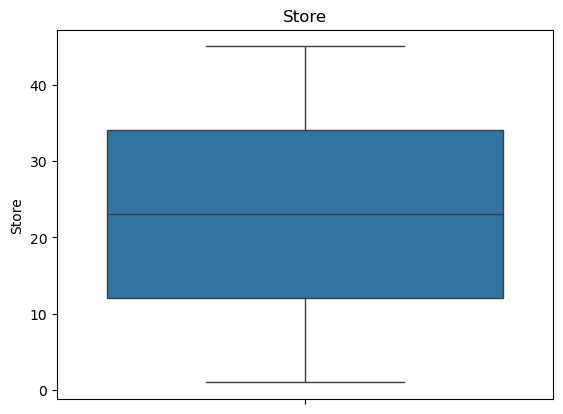

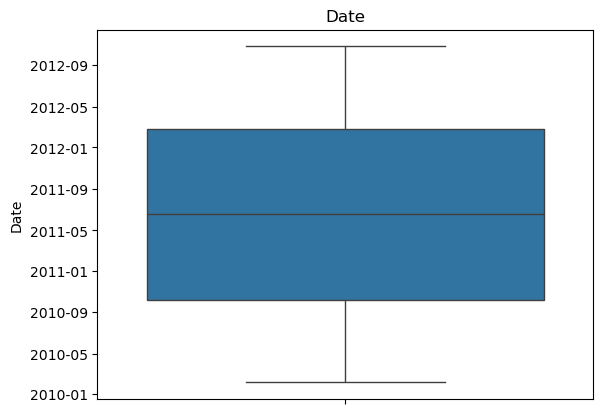

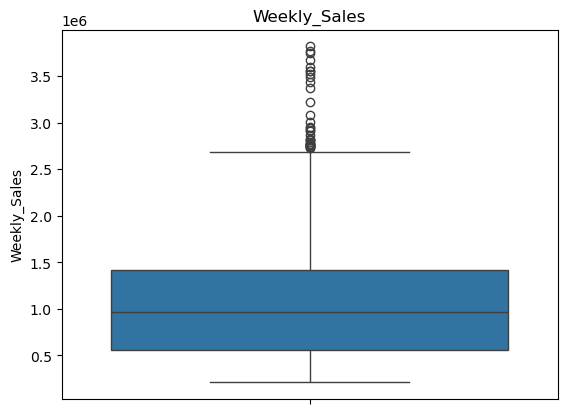

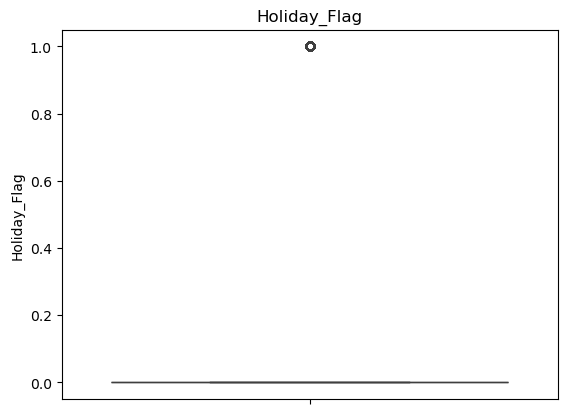

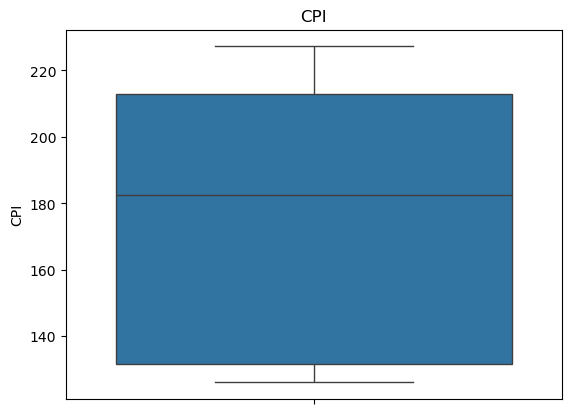

In [100]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

# Choosing the Algorithm for the Project
#  I will use the  Facebook  **Prophet  Model** for time series forecasting.

## **Motivation and Reasons For Choosing the Algorithm**

After visualizing the features using **box plots**, it was observed that the **target variable — Weekly_Sales — contains several outliers**.  
These outliers are visible as extreme spikes in the box plot and also correspond to sharp peaks in the time-series plots.

###  Interpretation of Outliers
- In this dataset, outliers are **not random errors or bad data points**.  
- They represent **real business events**, such as:
  - Holiday seasons (Thanksgiving, Christmas, etc.)
  - Store-wide discounts and promotions
  - Sudden increases in customer demand

Hence, **removing these outliers would remove meaningful information** and negatively affect forecasting accuracy.

###  Model Handling of Outliers
- Traditional time-series models like **ARIMA, SARIMA, or ETS** assume stable and stationary patterns.  
  - These models can **overreact or fail** when large spikes or irregular jumps occur.
- On the other hand, **Facebook Prophet** (now **Meta Prophet**) is designed to handle:
  - **Outliers and extreme values**
  - **Missing data points**
  - **Irregular time intervals**
  - **Automatic changepoint detection**

Therefore, Prophet can **smoothly capture sudden changes** in Weekly Sales without removing valuable data.

###  Conclusion
Since the **Weekly_Sales feature contains meaningful outliers**, we will:
- **Retain all data points**, without removing outliers.
- **Proceed with the Prophet model**, as it effectively manages outliers and missing values.
- Avoid ARIMA or ETS-based models, since they are not robust to sudden seasonal or event-driven spikes.

> **Final Decision:**  
> Prophet is the most suitable model for this dataset because it can handle both **seasonality** and **outliers** effectively.

# **Assumptions for Time Series Forecasting Using Prophet**

Prophet uses an **additive structure**: **y(t) = Trend + Seasonality + Holidays + Noise**

---

## **1. Dataset Assumptions**

### **1️⃣ The dataset must include a valid _date_ and _numeric sales_**
- Columns required:  
  - **ds** → **Date**  
  - **y** → **Sales in USD**  
- Sales must be **numeric**, **clean**, and **non-categorical**.

### **2️⃣ Sufficient and consistent historical sales data**
- At least **one full year** (preferably **multiple years**).  
- Data should follow a **regular daily/weekly frequency**.  
- **Missing dates** must be **filled**, **imputed**, or **interpolated**.

### **3️⃣ Strong seasonality and retail patterns exist**
- Expected patterns:  
  - **Weekly seasonality**  
  - **Yearly seasonality**  
- Major U.S. holidays causing predictable spikes:  
  - **Thanksgiving**, **Black Friday**, **Christmas**, **New Year**.

### **4️⃣ Promotional or abnormal retail spikes must be handled**
- Events such as **promotions**, **discounts**, and **clearance sales**  
  should be **treated**, **smoothed**, or **modeled** as **holiday/regressor effects**.

### **5️⃣ External features require future values (if used)**
- If using **Temperature**, **Fuel Price**, **CPI**, or **Unemployment**,  
  Prophet assumes **future values** of these regressors exist.

---

## **2. Prophet Model Assumptions**

### **6️⃣ Trend follows piecewise linear or logistic behavior**
- Prophet assumes trend changes occur at **changepoints**.  
- Works well when retail demand experiences **market-driven shifts**.

### **7️⃣ Seasonality is additive unless changed**
- Model structure: **Trend + Seasonality + Holiday Effects**.  
- Additive seasonality suits retail because effects **stack** on top of baseline demand.

### **8️⃣ Holiday effects create temporary predictable shifts**
- Prophet assumes **holiday events** create **short-term**, **repeatable** spikes.  
- Holiday dates must be **explicitly added** for accuracy.

### **9️⃣ Residual noise is assumed to be normally distributed**
- Prophet treats residuals as **Gaussian noise**.  
- **No autocorrelation** is assumed in errors.

---

## **3. Forecasting Assumptions**

### **1️⃣0️⃣ Future behavior follows historical patterns**
- Prophet expects **weekly cycles**, **yearly seasonality**,  
  and **holiday spikes** to **repeat** in a similar manner.

### **1️⃣1️⃣ No sudden structural changes occur**
- Assumes no **store closures**, **economic shocks**,  
  **supply-chain failures**, or **policy changes** unless modeled.

### **1️⃣2️⃣ Forecast uncertainty increases with horizon**
- Confidence intervals **widen** as forecasting extends further.  
- **Short-term** forecasts are more reliable than **long-term** forecasts.

---

In [125]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI
0,1,2010-02-05,1643690.90,0,211.096358
1,1,2010-02-12,1641957.44,1,211.242170
2,1,2010-02-19,1611968.17,0,211.289143
3,1,2010-02-26,1409727.59,0,211.319643
4,1,2010-03-05,1554806.68,0,211.350143


# **Model Evaluation and Techniques**

In [128]:
df=df.rename(columns={
            'Date':'ds',
             'Weekly_Sales':'y'
            })

## **Model Building**

Creating the **Prophet forecasting model** on the Walmart dataset to capture trend and seasonality patterns for sales prediction.


In [131]:
from prophet import Prophet

In [132]:
import logging
logging.getLogger('cmdstanpy').disabled = True

In [134]:
future_forecasts={}
train_df={}
test_df={}

for i in df['Store'].unique():
    store_df=df[df['Store']==i][['ds','y','Holiday_Flag','CPI']]

    train_df[i]=store_df.iloc[:-12]
    test_df[i]=store_df.iloc[-12:]    
    
    model=Prophet()
    model.add_regressor('Holiday_Flag')
    model.add_regressor('CPI')
    model.fit(train_df[i])

    future=store_df[['ds','Holiday_Flag','CPI']].copy()

    forecast=model.predict(future)
    future_forecasts[i]=forecast


### **Store-Level Forecast Visualization**

Comparing **actual vs. predicted values** for the **first store** to visualize how well the model captures real sales trends and find uncertainty intervals.

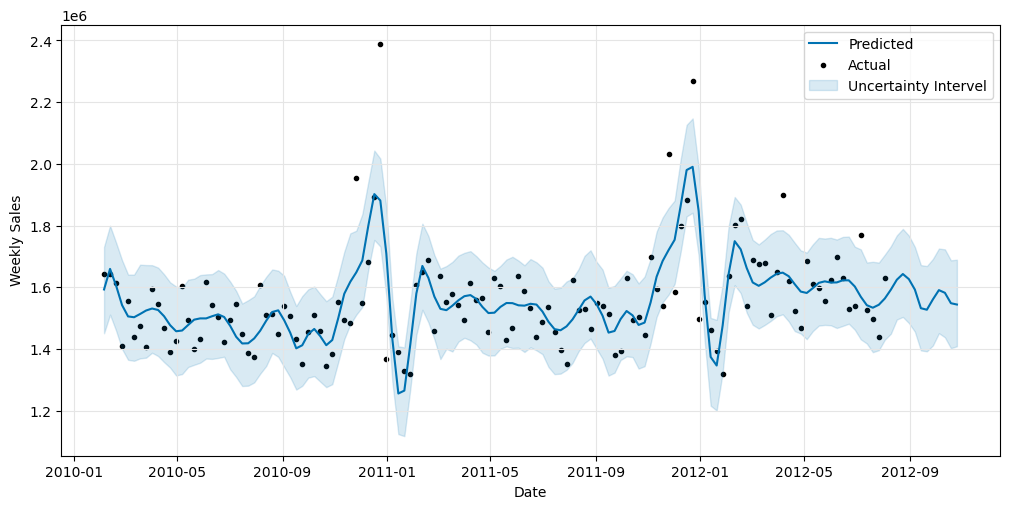

In [138]:
# Store 1 , Actual vs Predicted
fig ,ax = plt.subplots(figsize=(10,5))

ax.plot(future_forecasts[1]['ds'],future_forecasts[1]['yhat'],color='#0072B2',linewidth=1.5,label='Predicted')
ax.scatter(train_df[1]['ds'],train_df[1]['y'],color='black',s=9,label='Actual')
ax.fill_between(future_forecasts[1]['ds'],future_forecasts[1]['yhat_lower'],future_forecasts[1]['yhat_upper'],
                color='#0072B2',alpha=0.15,label='Uncertainty Intervel' )


ax.grid(True,color='#E5E5E5',linestyle='-',linewidth=0.8)
ax.legend(loc='best')
plt.tight_layout()
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.show()

## **Forecast Comparison for All Stores**

Using a **for loop** to automatically generate **actual vs. forecast plots** for all **45 stores**, ensuring consistent evaluation across the entire dataset.


In [177]:
from IPython.display import HTML, display
import io, base64

html = '<div style="height:500px; overflow-y:scroll; border:2px solid #444;">'

plt.style.use('default')
for i in df['Store'].unique():
    store=df[df['Store']==i]
    plt.figure(figsize=(11,4))
    plt.plot(store['ds'],store['y'],color='#0072B2',linewidth=1.5,label='Actual')
    plt.plot(future_forecasts[i]['ds'],future_forecasts[i]['yhat'],linestyle='--',linewidth=1.5,color='darkorange',label='Predicted')
    plt.title(f'Store{i} - Actual vs Predicted',fontsize=12)
    plt.xlabel('Date',fontsize=11)
    plt.ylabel('Sales',fontsize=11)

    plt.legend(fontsize=12,loc='best',frameon=True,shadow=True)
    plt.grid(True,linestyle='--',alpha=0.5)
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    img = base64.b64encode(buf.getvalue()).decode()
    html += f'<img src="data:image/png;base64,{img}" style="width:100%; margin:5px 0;">'

html += '</div>'
display(HTML(html))

# Graphs are not included in this version.  
# Please refer to the “With_Graphs” notebook to view all visualizations.

## **Model Evaluation Metrics**

Calculating key **error metrics** to evaluate model performance across stores:
- **MAE (Mean Absolute Error)** – Measures average magnitude of errors.
- **RMSE (Root Mean Squared Error)** – Penalizes large errors more heavily.
- **MSE (Mean Squared Error)** – Evaluates squared deviations from actual values.
- **MAPE (Mean Absolute Percentage Error)** – Measures relative accuracy in percentage terms.

In [145]:
from sklearn.metrics import *

In [147]:
stores=[]
mae_list=[]
mse_list=[]
rmse_list=[]
mape_list=[]
n=0

for i in df['Store'].unique(): 
    mae=mean_absolute_error(test_df[i]['y'],future_forecasts[i]['yhat'].iloc[-12:])
    mse=mean_squared_error(test_df[i]['y'],future_forecasts[i]['yhat'].iloc[-12:])
    rmse=np.sqrt(mse)
    mape=mean_absolute_percentage_error(test_df[i]['y'],future_forecasts[i]['yhat'].iloc[-12:])*100

    stores.append(i)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)

    n+=1

stores.append('Total Errors')
mae_list.append(np.mean(mae_list))
mse_list.append(np.mean(mse_list))
rmse_list.append(np.mean(rmse_list))
mape_list.append(np.mean(mape_list))


metrics_df=pd.DataFrame({
    'Store':stores,
    'MAE':mae_list,
    'RMSE':rmse_list,
    'MSE':mse_list,
    'MAPE (%)':mape_list
})
pd.set_option('display.float_format','{:.2f}'.format)


In [148]:
metrics_df

,Store,MAE,RMSE,MSE,MAPE (%)
0,1,52208.48,68318.93,4667476760.56,3.41
1,2,75659.09,88463.29,7825753548.76,4.01
2,3,11988.11,14234.68,202626034.53,2.95
3,4,64411.30,80843.31,6535641160.78,3.05
4,5,9657.35,11266.84,126941685.41,3.02
5,6,59296.38,71481.66,5109627323.21,3.93
6,7,61748.39,63029.45,3972711315.31,11.17
7,8,28101.37,34919.12,1219345185.84,3.02
8,9,15135.10,20090.22,403616814.97,2.75
9,10,44826.87,55136.56,3040039763.22,2.62


# **Inferences**  




# **Inferences from the Dataset**


## Data-Driven Insights and Store Performance Analysis – Walmart Retail Dataset

*Using the given dataset, the following analysis highlights key patterns and trends that can help individual stores improve their performance and decision-making.*

---

## 1. Weekly Sales Analysis (Time Series Behavior)
- When plotting **Weekly Sales vs Date** for each store, a **clear seasonal pattern** is observed.  
- **Sales rise sharply during the end of each year (especially December)** across most stores.  
- This pattern suggests a **strong yearly seasonality** in sales behavior.  
- However, **a few stores (Store 33, 36, 38, 42, and 43)** do **not show this end-of-year sales spike**, indicating local differences or unique market conditions.  
- Overall, sales show **high variability** between stores, but **consistent yearly seasonality** across most of them.  
- This insight can help underperforming stores identify **seasonal sales strategies** and align promotions with peak demand periods.  

---

## 2. Temperature Trend Analysis
- **Temperature increases during June–July** and **decreases during December–January**, consistent with normal weather patterns.  
- The variation in temperature helps explain seasonal buying trends:  
  - Higher temperatures → higher demand for cooling products.  
  - Lower temperatures → higher demand for warm clothing or heating-related items.  
- Temperature is thus an **important seasonal driver** of weekly sales, and stores can adjust **product mix and marketing campaigns** accordingly.  

---

## 3. Fuel Price Trend
- The **fuel price generally shows an upward trend** over 2010–2012.  
- In **2011**, prices rise significantly and then fluctuate — rising in **May** and falling slightly in **September–October**.  
- Overall direction: **upward**, showing an **increasing trend** in fuel cost over time.  
- Since rising fuel prices can increase **transportation and logistics costs**, stores can plan inventory more efficiently and **optimize supply chain timing** to reduce expenses.  

---

## 4. Consumer Price Index (CPI)
- The **CPI shows a clear upward (multiplicative) trend** over time, indicating **rising inflation and cost of goods**.  
- This steady increase suggests customers may become **price-sensitive** over time.  
- Stores can focus on **discount strategies, loyalty programs, or value-driven promotions** to maintain steady sales growth during inflationary periods.  

---

## 5. Unemployment Rate
- **Unemployment gradually decreases** from **2010 through mid-2011**, showing economic improvement.  
- After mid-2011, the rate declines even more sharply, reflecting stronger job growth.  
- Lower unemployment generally leads to **higher consumer spending**, benefiting retail sales.  
- Stores can align **inventory planning** and **marketing efforts** with improving economic conditions to maximize profit opportunities.  

---

## 6. Correlation Analysis
A **correlation heatmap** was used to check relationships among numeric features.

Key observations:
- **Date and Fuel Price** → strong positive correlation (**≈ 0.77**): as time increases, fuel price increases.  
- **Store number and Weekly Sales** → negative correlation: stores with higher IDs tend to have lower sales on average.  
- These relationships help identify which features have the mategies** based on local economic and seasonal behavior.  

---

# **Inferences from the Prophet Model**

### **1️⃣ MAPE-Based Store Performance**

After evaluating all 45 stores using key error metrics (**MAE**, **RMSE**, **MSE**, and **MAPE**), we analyzed the performance levels based on **Mean Absolute Percentage Error (MAPE)**.

All stores performed **excellent overall**, with low **MAPE** values indicating strong model accuracy and reliable forecasting.

- **Very Excellent Stores (MAPE < 3):**  
  Store 3, Store 5, Store 11, Store 19, Store 24, Store 27, Store 31  
  → These stores performed **very excellent**, as their percentage errors are extremely low.  
  The Prophet model captured both **trend** and **seasonality** with high precision.

- **Acceptable Store (MAPE > 12):**  
  Store 35  
  → This store has a relatively higher error (**MAPE > 12**), meaning the model's performance here is **acceptable but weaker**.  
  The difference may be caused by **irregular demand** or **unaccounted external factors**.

---

### **2️⃣ Spike Detection Using RMSE–MAE Gap**

To analyze the model's ability to handle sharp fluctuations, we compared **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)** for each store.

- A **large RMSE–MAE gap** means poor spike handling.  
- A **small RMSE–MAE gap** means consistent and stable predictions.

**Key Observations:**
- Stores like **Store 28** and **Store 30** show **high error gaps**, indicating the model struggles to capture sudden spikes.  
- Stores like **Store 3**, **Store 5**, and **Store 11** show **small gaps**, meaning predictions are smooth and stable.

---

### **3️⃣ Overall Prophet Model Behavior**

- The **Prophet model** successfully captured the **overall trend** and **seasonality** for most stores.  
- While the model identified seasonal patterns correctly (especially around year-end), it slightly **underestimates the seasonal peaks** — meaning it recognizes when sales rise, but the **magnitude of increase** is not as high as in actual data.  
- The model performs very well in capturing **smooth intervals of rise and fall**, especially for **Store 7**, **Store 16**, and **Store 17**, showing strong trend understanding.  
- **Store 28** and **Store 30** have **yearly seasonality**, but the model failed to capture that yearly seasonality effectively.  
- **Store 35** performed **poorly**, as its **actual and predicted lines diverge significantly at the end**, showing weak adaptability during later time periods.

---

### **4️⃣ Final Observation**

Overall, the Prophet model performed **strongly across most stores**, showing:

- Accurate detection of **long-term trends**  
- Reliable understanding of **seasonal patterns**  
- Minor limitations in **handling sudden spikes or sharp peaks**

---

### **Conclusion**

The Prophet model achieved **excellent overall forecasting performance** across all stores.  
Few stores achieved **very excellent precision (MAPE < 3)**, only one store (**Store 35**) had **acceptable performance (MAPE ≈ 26%)**, while the remaining stores performed **excellent**.  
Despite minor spike sensitivity, the model can be **confidently used for production-level demand forecasting**.

# **Future Possibilities of the Project**

Even though the current Prophet-based forecasting model performed excellently across all stores, there are still several meaningful directions for improvement and expansion in the future.

---

### 1️⃣ Model Comparison and Benchmarking
- The current Prophet model can be **compared with other advanced forecasting models** such as:
  - **LSTM (Long Short-Term Memory)**
  - **XGBoost Regressor**
- This comparison will help identify which model performs best in terms of **accuracy**, **trend capturing**, and **spike handling** for Walmart’s sales data.
- Since the dataset contains **outliers and sudden variations**, models like **ARIMA/SARIMA** are not suitable, making Prophet, LSTM, and XGBoost better choices for future experimentation.

---

### 2️⃣ Hyperparameter Tuning
- Prophet allows tuning of parameters like:
  - **Changepoint prior scale** → controls flexibility of the trend.
  - **Seasonality prior scale** → adjusts the strength of seasonal patterns.
  - **Seasonality mode (additive or multiplicative)** → modifies how seasonality interacts with the trend.
- By applying **hyperparameter tuning**, we can further **optimize model performance**, reduce forecasting errors, and achieve better generalization.

---

### 3️⃣ Interactive Dashboard (Power BI)
- A **Power BI dashboard** can be developed to visualize:
  - Store-wise **forecasted vs actual sales**
  - **MAPE**, **MAE**, and **RMSE** metrics
  - Monthly and yearly trends
- This dashboard will make it easier for managers to **track store performance**, identify underperforming stores, and make **data-driven business decisions**.

---

### 4️⃣ Business Application and Deployment
- The final model can be **deployed into a real-time demand forecasting system**.
- It can support:
  - **Inventory management**
  - **Supply chain optimization**
  - **Sales planning and decision-making**
- This deployment will allow Walmart to **use AI-driven insights** directly in daily business operations.

---

### **Conclusion**
The project successfully demonstrates accurate forecasting using the Prophet model.  
In the future, by performing **model comparison**, **parameter optimization**, and **interactive dashboard creation**, this project can evolve into a **complete forecasting and business intelligence solution** for real-world retail operations.

## **Note**  
Some parts of this project, including a few Markdown explanations and formatting sections, were prepared with assistance from AI-based tools (like ChatGPT) for improving clarity, structure, and presentation.  

**All data analysis, model building, and implementation were performed by me.**